In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [3]:
PATH ='./metrics/' # change to your metrics path

df_METRICS_ZO_SGD = {}
files_zo_sgd = ['firstrun_mynet_zo_sgd-ep_60-lr_0.01-eps_0.001',
                'secondrun_mynet_zo_sgd-ep_98-lr_0.01-eps_0.001','thirdrun_mynet_zo_sgd-ep_71-lr_0.01-eps_0.001',
                'fourthrun_mynet_zo_sgd-ep_40-lr_0.01-eps_0.001',
                'mynet_zo_sgd-ep_67-lr_0.002-bs_64','zofosgd_zo-0.0002_mynet_zo_sgd-ep_99-lr_0.0002-eps_0.001'] # keep the optimal configs at the first three places and append other configs behind
df_METRICS_ZO_SIGN_SGD = {}
files_zo_sign_sgd = ['firstrun_mynet_zo_sign_sgd-ep_3-lr_0.001-eps_0.001','secondrun_mynet_zo_sign_sgd-ep_12-lr_0.001-eps_0.001',
                     'thirdrun_mynet_zo_sign_sgd-ep_5-lr_0.001-eps_0.001',
                     'mynet_zo_sign_sgd-ep_90-lr_0.0002-bs_64','zofosignsgd-zo-0.01_mynet_zo_sign_sgd-ep_0-lr_0.01-eps_0.001',
                     'zofosignsgd-zo-0.002_mynet_zo_sign_sgd-ep_41-lr_0.002-eps_0.001','zofosignsgd-zo-0.00002_mynet_zo_sign_sgd-ep_99-lr_2e-05-eps_0.001']
df_METRICS_FO_SGD = {}
files_fo_sgd = ['firstrun_mynet_fo_sgd-ep_73-lr_0.01-momentum_0.9','secondrun_mynet_fo_sgd-ep_99-lr_0.01-momentum_0.9',
                'thirdrun_mynet_fo_sgd-ep_92-lr_0.01-momentum_0.9','mynet_fo_sgd-ep_95-lr_0.002-bs_64',
                'fourthrun_mynet_fo_sgd-ep_39-lr_0.01-momentum_0.9',
                'zofosgd_fo-0.0002_mynet_fo_sgd-ep_99-lr_0.0002-momentum_0']
df_METRICS_FO_SIGN_SGD = {}
files_fo_sign_sgd = ['firstrun_mynet_fo_sign_sgd-ep_59-lr_0.0001','secondrun_mynet_fo_sign_sgd-ep_77-lr_0.0001',
                     'thirdrun_mynet_fo_sign_sgd-ep_47-lr_0.0001','mynet_fo_sign_sgd-ep_19-lr_0.0002-bs_64',
                     'fourthrun_mynet_fo_sign_sgd-ep_38-lr_0.0001',
                     'zofosignsgd-fo-0.01_mynet_fo_sign_sgd-ep_1-lr_0.01','zofosignsgd-fo-0.002_mynet_fo_sign_sgd-ep_1-lr_0.002',
                     'zofosignsgd-fo-0.00002_mynet_fo_sign_sgd-ep_92-lr_2e-05']

for file in files_zo_sgd:
    df_METRICS_ZO_SGD[file] = pd.read_csv(PATH + '\\' + file + '.csv')
for file in files_zo_sign_sgd:
    df_METRICS_ZO_SIGN_SGD[file] = pd.read_csv(PATH + '\\' + file + '.csv')
for file in files_fo_sgd:
    df_METRICS_FO_SGD[file] = pd.read_csv(PATH + '\\' + file + '.csv')
for file in files_fo_sign_sgd:
    df_METRICS_FO_SIGN_SGD[file] = pd.read_csv(PATH + '\\' + file + '.csv')

df_METRICS_FO_SGD['firstrun_mynet_fo_sgd-ep_73-lr_0.01-momentum_0.9']


,train_loss,train_acc,test_loss,test_acc
0,1.719333,0.783965,1.552103,0.9194
1,1.544940,0.922441,1.535472,0.9314
2,1.527067,0.939449,1.519656,0.9453
3,1.516070,0.949194,1.513770,0.9506
4,1.508369,0.956090,1.506555,0.9567
...,...,...,...,...
95,1.467549,0.993720,1.484264,0.9778
96,1.467545,0.993720,1.484215,0.9779
97,1.467540,0.993753,1.484266,0.9779
98,1.467552,0.993737,1.484239,0.9778


# Compare optimal configurations

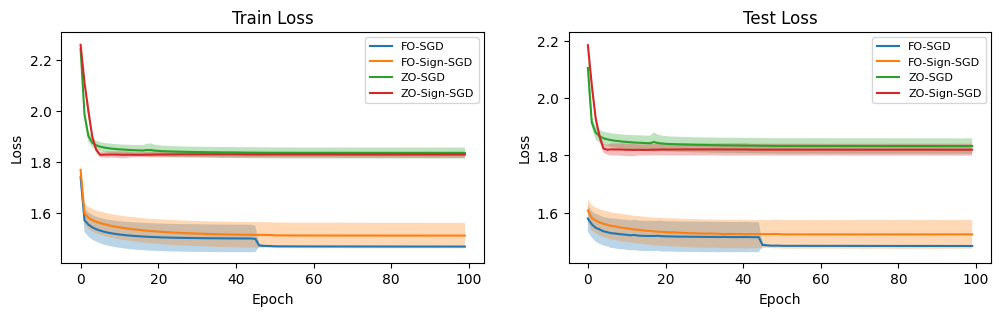

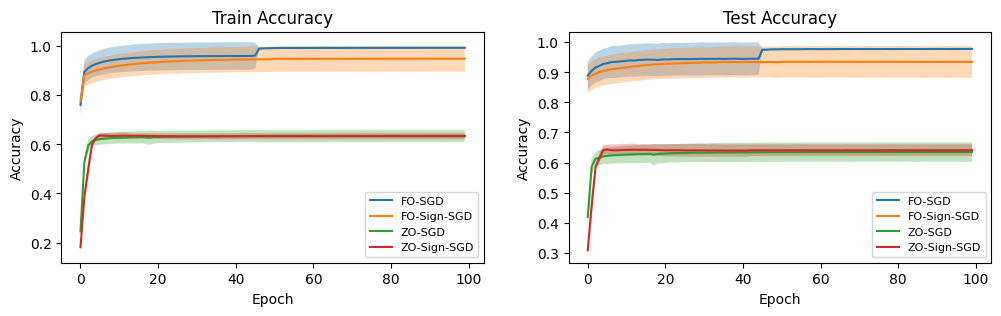

In [4]:
# loss
metrics = ['train_loss', 'train_acc', 'test_loss', 'test_acc']
#fig, axs = plt.subplots( 1, 2, figsize=(12, 4))
means_fo_sgd = {}
stds_fo_sgd = {}

for metric in metrics:
    metric_values = []
    #choose the first three files as the optimal configs
    for file in files_fo_sgd[:3]:
        df = df_METRICS_FO_SGD[file]
        metric_values.append(df[metric])

    combined_df = pd.concat(metric_values, axis=1)
    means_fo_sgd[metric] = combined_df.mean(axis=1)
    stds_fo_sgd[metric] = combined_df.std(axis=1)

means_fo_sign_sgd = {}
stds_fo_sign_sgd = {}

for metric in metrics:
    metric_values = []
    for file in files_fo_sign_sgd[:3]:
        df = df_METRICS_FO_SIGN_SGD[file]
        metric_values.append(df[metric])

    combined_df = pd.concat(metric_values, axis=1)
    means_fo_sign_sgd[metric] = combined_df.mean(axis=1)
    stds_fo_sign_sgd[metric] = combined_df.std(axis=1)

means_zo_sgd = {}  
stds_zo_sgd = {}

for metric in metrics: 
    metric_values = []
    for file in files_zo_sgd[:3]:
        df = df_METRICS_ZO_SGD[file]
        metric_values.append(df[metric])

    combined_df = pd.concat(metric_values, axis=1)
    means_zo_sgd[metric] = combined_df.mean(axis=1)
    stds_zo_sgd[metric] = combined_df.std(axis=1)


means_zo_sign_sgd = {}
stds_zo_sign_sgd = {}

for metric in metrics:
    metric_values = []
    for file in files_zo_sign_sgd[:3]:
        df = df_METRICS_ZO_SIGN_SGD[file]
        metric_values.append(df[metric])

    combined_df = pd.concat(metric_values, axis=1)
    means_zo_sign_sgd[metric] = combined_df.mean(axis=1)
    stds_zo_sign_sgd[metric] = combined_df.std(axis=1)


fig, axs = plt.subplots( 1, 2, figsize=(12, 3))

# loss
# train loss
mean = means_fo_sgd['train_loss']
std = stds_fo_sgd['train_loss']
axs[0].plot(mean,label="FO-SGD")
axs[0].fill_between(mean.index, mean - std, mean + std, alpha=0.3)
mean = means_fo_sign_sgd['train_loss']
std = stds_fo_sign_sgd['train_loss']
axs[0].plot(mean,label="FO-Sign-SGD")
axs[0].fill_between(mean.index, mean - std, mean + std, alpha=0.3)
mean = means_zo_sgd['train_loss']
std = stds_zo_sgd['train_loss']
axs[0].plot(mean,label="ZO-SGD")
axs[0].fill_between(mean.index, mean - std, mean + std, alpha=0.3)
mean = means_zo_sign_sgd['train_loss']
std = stds_zo_sign_sgd['train_loss']
axs[0].plot(mean,label="ZO-Sign-SGD")
axs[0].fill_between(mean.index, mean - std, mean + std, alpha=0.3)

axs[0].set_title("Train Loss")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel('Loss')
#set legend font size

axs[0].legend(fontsize=8)


# test loss
mean = means_fo_sgd['test_loss']
std = stds_fo_sgd['test_loss']
axs[1].plot(mean,label="FO-SGD")
axs[1].fill_between(mean.index, mean - std, mean + std, alpha=0.3)
mean = means_fo_sign_sgd['test_loss']
std = stds_fo_sign_sgd['test_loss']
axs[1].plot(mean,label="FO-Sign-SGD")
axs[1].fill_between(mean.index, mean - std, mean + std, alpha=0.3)
mean = means_zo_sgd['test_loss']
std = stds_zo_sgd['test_loss']
axs[1].plot(mean,label="ZO-SGD")
axs[1].fill_between(mean.index, mean - std, mean + std, alpha=0.3)
mean = means_zo_sign_sgd['test_loss']
std = stds_zo_sign_sgd['test_loss']
axs[1].plot(mean,label="ZO-Sign-SGD")
axs[1].fill_between(mean.index, mean - std, mean + std, alpha=0.3)

axs[1].set_title("Test Loss")   
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel('Loss')
axs[1].legend(fontsize=8)
plt.show()

# accuracy
# train accuracy
fig, axs = plt.subplots( 1, 2, figsize=(12, 3))
mean = means_fo_sgd['train_acc']
std = stds_fo_sgd['train_acc']
axs[0].plot(mean,label="FO-SGD")
axs[0].fill_between(mean.index, mean - std, mean + std, alpha=0.3)
mean = means_fo_sign_sgd['train_acc']
std = stds_fo_sign_sgd['train_acc']
axs[0].plot(mean,label="FO-Sign-SGD")
axs[0].fill_between(mean.index, mean - std, mean + std, alpha=0.3)
mean = means_zo_sgd['train_acc']
std = stds_zo_sgd['train_acc']
axs[0].plot(mean,label="ZO-SGD")
axs[0].fill_between(mean.index, mean - std, mean + std, alpha=0.3)
mean = means_zo_sign_sgd['train_acc']
std = stds_zo_sign_sgd['train_acc']
axs[0].plot(mean,label="ZO-Sign-SGD")
axs[0].fill_between(mean.index, mean - std, mean + std, alpha=0.3)

axs[0].set_title("Train Accuracy")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel('Accuracy')
axs[0].legend(fontsize=8)

# test accuracy
mean = means_fo_sgd['test_acc']
std = stds_fo_sgd['test_acc']
axs[1].plot(mean,label="FO-SGD")
axs[1].fill_between(mean.index, mean - std, mean + std, alpha=0.3)
mean = means_fo_sign_sgd['test_acc']
std = stds_fo_sign_sgd['test_acc']
axs[1].plot(mean,label="FO-Sign-SGD")
axs[1].fill_between(mean.index, mean - std, mean + std, alpha=0.3)
mean = means_zo_sgd['test_acc']
std = stds_zo_sgd['test_acc']
axs[1].plot(mean,label="ZO-SGD")
axs[1].fill_between(mean.index, mean - std, mean + std, alpha=0.3)
mean = means_zo_sign_sgd['test_acc']
std = stds_zo_sign_sgd['test_acc']
axs[1].plot(mean,label="ZO-Sign-SGD")
axs[1].fill_between(mean.index, mean - std, mean + std, alpha=0.3)
axs[1].set_title("Test Accuracy")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel('Accuracy')
axs[1].legend(fontsize=8)
plt.show()

# Compare same learning rate

Text(0, 0.5, 'Train Accuracy')

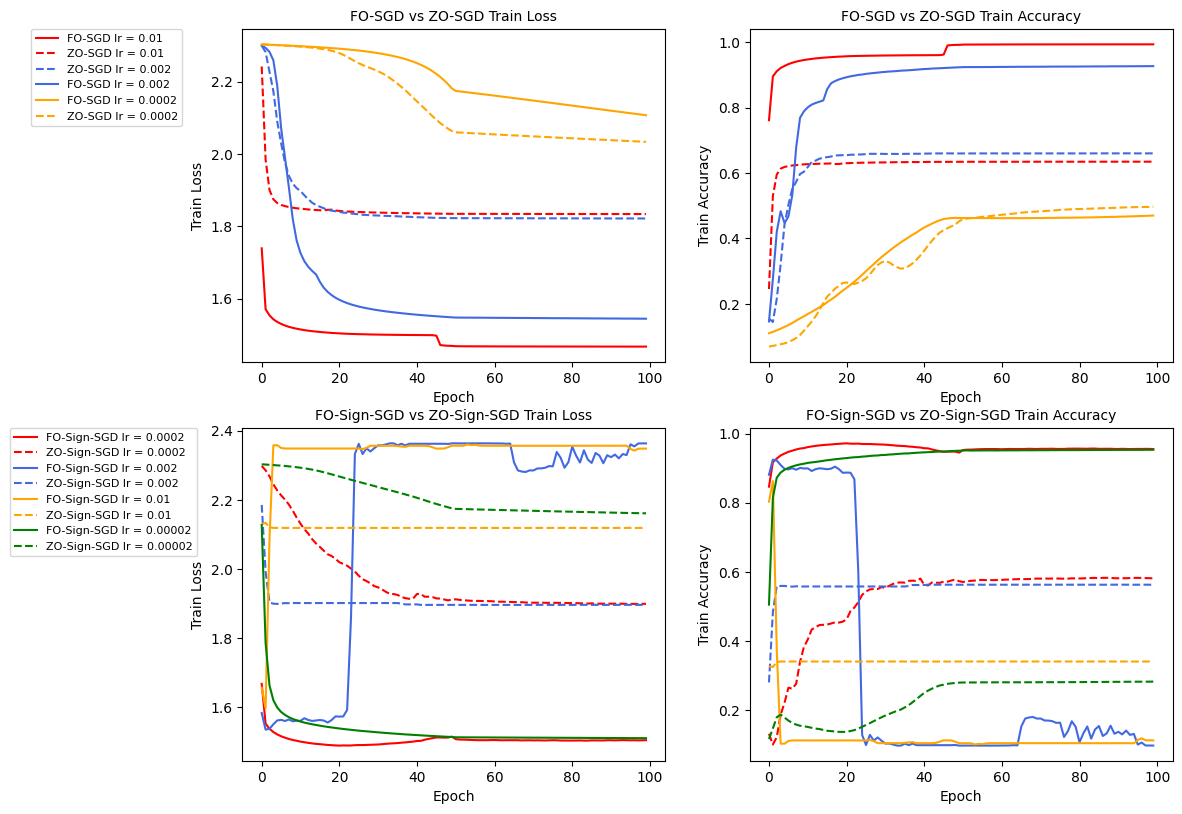

In [5]:
#subplot for zo_sgd vs fo_sgd / zo_sign_sgd vs fo_sign_sgd
fig, axs = plt.subplots( 2, 2, figsize=(12, 9.5))
# zo_sgd vs fo_sgd train loss 
axs[0,0].plot(means_fo_sgd['train_loss'],label="FO-SGD lr = 0.01",color='red')
axs[0,0].plot(means_zo_sgd['train_loss'],label="ZO-SGD lr = 0.01",linestyle='dashed',color='red')
axs[0,0].plot(df_METRICS_ZO_SGD['mynet_zo_sgd-ep_67-lr_0.002-bs_64']['train_loss'],label="ZO-SGD lr = 0.002",linestyle='dashed',color='royalblue')
axs[0,0].plot(df_METRICS_FO_SGD['mynet_fo_sgd-ep_95-lr_0.002-bs_64']['train_loss'],label="FO-SGD lr = 0.002",color='royalblue')
axs[0,0].plot(df_METRICS_FO_SGD['zofosgd_fo-0.0002_mynet_fo_sgd-ep_99-lr_0.0002-momentum_0']['train_loss'],label="FO-SGD lr = 0.0002",color='orange')
axs[0,0].plot(df_METRICS_ZO_SGD['zofosgd_zo-0.0002_mynet_zo_sgd-ep_99-lr_0.0002-eps_0.001']['train_loss'],label="ZO-SGD lr = 0.0002",linestyle='dashed',color='orange')
axs[0,0].set_title("FO-SGD vs ZO-SGD Train Loss",fontsize=10)
axs[0,0].set_xlabel("Epoch")
axs[0,0].set_ylabel('Train Loss')
axs[0,0].legend(bbox_to_anchor=(-0.5, 1), loc='upper left', borderaxespad=0.,fontsize=8)

# zo_sgd vs fo_sgd train accuracy
axs[0,1].plot(means_fo_sgd['train_acc'],label="FO-SGD lr = 0.01",color='red')
axs[0,1].plot(means_zo_sgd['train_acc'],label="ZO-SGD lr = 0.01",linestyle='dashed',color='red')
axs[0,1].plot(df_METRICS_ZO_SGD['mynet_zo_sgd-ep_67-lr_0.002-bs_64']['train_acc'],label="ZO-SGD lr = 0.002",linestyle='dashed',color='royalblue')
axs[0,1].plot(df_METRICS_FO_SGD['mynet_fo_sgd-ep_95-lr_0.002-bs_64']['train_acc'],label="FO-SGD lr = 0.002",color='royalblue')
axs[0,1].plot(df_METRICS_FO_SGD['zofosgd_fo-0.0002_mynet_fo_sgd-ep_99-lr_0.0002-momentum_0']['train_acc'],label="FO-SGD lr = 0.0002",color='orange')
axs[0,1].plot(df_METRICS_ZO_SGD['zofosgd_zo-0.0002_mynet_zo_sgd-ep_99-lr_0.0002-eps_0.001']['train_acc'],label="ZO-SGD lr = 0.0002",linestyle='dashed',color='orange')
axs[0,1].set_title("FO-SGD vs ZO-SGD Train Accuracy",fontsize=10)
axs[0,1].set_xlabel("Epoch")
axs[0,1].set_ylabel('Train Accuracy')

# zo_sign_sgd vs fo_sign_sgd train loss
axs[1,0].plot(df_METRICS_FO_SIGN_SGD['mynet_fo_sign_sgd-ep_19-lr_0.0002-bs_64']['train_loss'],label="FO-Sign-SGD lr = 0.0002",color='red')
axs[1,0].plot(df_METRICS_ZO_SIGN_SGD['mynet_zo_sign_sgd-ep_90-lr_0.0002-bs_64']['train_loss'],label="ZO-Sign-SGD lr = 0.0002",linestyle='dashed',color='red')
axs[1,0].plot(df_METRICS_FO_SIGN_SGD['zofosignsgd-fo-0.002_mynet_fo_sign_sgd-ep_1-lr_0.002']['train_loss'],label="FO-Sign-SGD lr = 0.002",color='royalblue')
axs[1,0].plot(df_METRICS_ZO_SIGN_SGD['zofosignsgd-zo-0.002_mynet_zo_sign_sgd-ep_41-lr_0.002-eps_0.001']['train_loss'],label="ZO-Sign-SGD lr = 0.002",linestyle='dashed',color='royalblue')
axs[1,0].plot(df_METRICS_FO_SIGN_SGD['zofosignsgd-fo-0.01_mynet_fo_sign_sgd-ep_1-lr_0.01']['train_loss'],label="FO-Sign-SGD lr = 0.01",color='orange')
axs[1,0].plot(df_METRICS_ZO_SIGN_SGD['zofosignsgd-zo-0.01_mynet_zo_sign_sgd-ep_0-lr_0.01-eps_0.001']['train_loss'],label="ZO-Sign-SGD lr = 0.01",linestyle='dashed',color='orange')
axs[1,0].plot(df_METRICS_FO_SIGN_SGD['zofosignsgd-fo-0.00002_mynet_fo_sign_sgd-ep_92-lr_2e-05']['train_loss'],label="FO-Sign-SGD lr = 0.00002",color='green')
axs[1,0].plot(df_METRICS_ZO_SIGN_SGD['zofosignsgd-zo-0.00002_mynet_zo_sign_sgd-ep_99-lr_2e-05-eps_0.001']['train_loss'],label="ZO-Sign-SGD lr = 0.00002",linestyle='dashed',color='green')
axs[1,0].set_title("FO-Sign-SGD vs ZO-Sign-SGD Train Loss",fontsize=10)
axs[1,0].set_xlabel("Epoch")
axs[1,0].set_ylabel('Train Loss')
axs[1,0].legend(bbox_to_anchor=(-0.55, 1), loc='upper left', borderaxespad=0.,fontsize=8)

# zo_sign_sgd vs fo_sign_sgd train accuracy
axs[1,1].plot(df_METRICS_FO_SIGN_SGD['mynet_fo_sign_sgd-ep_19-lr_0.0002-bs_64']['train_acc'],label="FO-Sign-SGD lr = 0.0002",color='red')
axs[1,1].plot(df_METRICS_ZO_SIGN_SGD['mynet_zo_sign_sgd-ep_90-lr_0.0002-bs_64']['train_acc'],label="ZO-Sign-SGD lr = 0.0002",linestyle='dashed',color='red')
axs[1,1].plot(df_METRICS_FO_SIGN_SGD['zofosignsgd-fo-0.002_mynet_fo_sign_sgd-ep_1-lr_0.002']['train_acc'],label="FO-Sign-SGD lr = 0.002",color='royalblue')
axs[1,1].plot(df_METRICS_ZO_SIGN_SGD['zofosignsgd-zo-0.002_mynet_zo_sign_sgd-ep_41-lr_0.002-eps_0.001']['train_acc'],label="ZO-Sign-SGD lr = 0.002",linestyle='dashed',color='royalblue')
axs[1,1].plot(df_METRICS_FO_SIGN_SGD['zofosignsgd-fo-0.01_mynet_fo_sign_sgd-ep_1-lr_0.01']['train_acc'],label="FO-Sign-SGD lr = 0.01",color='orange')
axs[1,1].plot(df_METRICS_ZO_SIGN_SGD['zofosignsgd-zo-0.01_mynet_zo_sign_sgd-ep_0-lr_0.01-eps_0.001']['train_acc'],label="ZO-Sign-SGD lr = 0.01",linestyle='dashed',color='orange')
axs[1,1].plot(df_METRICS_FO_SIGN_SGD['zofosignsgd-fo-0.00002_mynet_fo_sign_sgd-ep_92-lr_2e-05']['train_acc'],label="FO-Sign-SGD lr = 0.00002",color='green')
axs[1,1].plot(df_METRICS_ZO_SIGN_SGD['zofosignsgd-zo-0.00002_mynet_zo_sign_sgd-ep_99-lr_2e-05-eps_0.001']['train_acc'],label="ZO-Sign-SGD lr = 0.00002",linestyle='dashed',color='green')
axs[1,1].set_title("FO-Sign-SGD vs ZO-Sign-SGD Train Accuracy",fontsize=10)
axs[1,1].set_xlabel("Epoch")
axs[1,1].set_ylabel('Train Accuracy')

# Compare training time

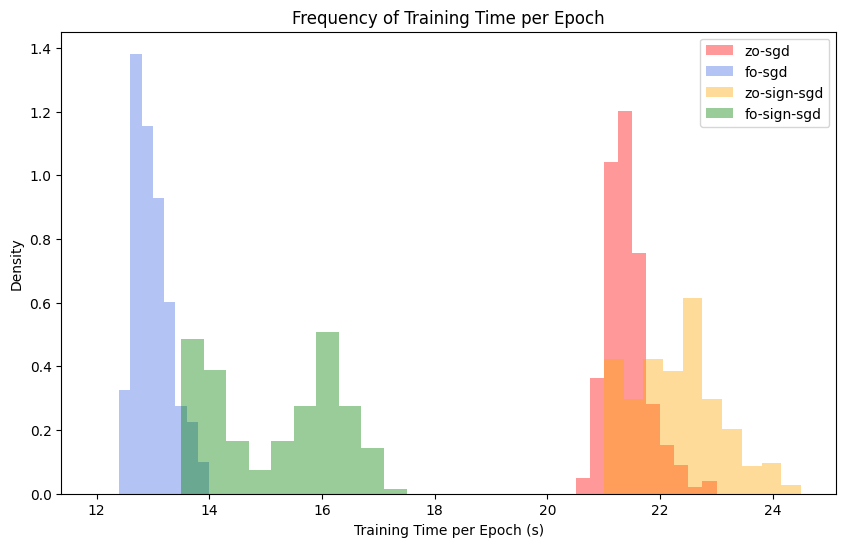

In [6]:
zo_sgd_times = []
fo_sgd_times = []
zo_sign_sgd_times = []
fo_sign_sgd_times = []

for file in files_fo_sgd:
    df = df_METRICS_FO_SGD[file]
    if 'time' in df.columns:
        fo_sgd_times.extend(df['time'])
for file in files_zo_sgd:
    df = df_METRICS_ZO_SGD[file]
    if 'time' in df.columns:
        zo_sgd_times.extend(df['time'])

for file in files_fo_sign_sgd:
    df = df_METRICS_FO_SIGN_SGD[file]
    if 'time' in df.columns:
        fo_sign_sgd_times.extend(df['time'])
for file in files_zo_sign_sgd:
    df = df_METRICS_ZO_SIGN_SGD[file]
    if 'time' in df.columns:
        zo_sign_sgd_times.extend(df['time'])

plt.figure(figsize=(10, 6))
plt.hist(zo_sgd_times, bins=10, alpha=0.4, label='zo-sgd',color='red',density=True,range=(20.5,23))
plt.hist(fo_sgd_times, bins=10, alpha=0.4, label='fo-sgd',color='royalblue',density=True,range=(12,14))

plt.hist(zo_sign_sgd_times, bins=10, alpha=0.4, label='zo-sign-sgd',density=True,color='orange',range=(21,24.5))
plt.hist(fo_sign_sgd_times, bins=10, alpha=0.4, label='fo-sign-sgd',density=True,color='green',range=(13.5,17.5))

plt.xlabel('Training Time per Epoch (s)')
plt.ylabel('Density')
plt.title('Frequency of Training Time per Epoch')
plt.legend()


plt.show()

# Model scaling

In [7]:
def visualize_accuracy(names, metrics, title, save):
    
    plt.figure(figsize = (8,5))
    for idx, metric in enumerate(metrics):
        for jdx, m in enumerate(metric):
            if (m == "train_acc"):
                plt.plot(range(len(metric[m])), metric[m], label = names[idx])
    
    plt.title(title)
    plt.xticks(np.arange(0, len(metrics[0]["train_acc"]), 2), 
               np.arange(0, len(metric["train_acc"]), 2))
    plt.ylabel("Accuracy")
    plt.xlabel("N Epochs")
    plt.ylim(0.9, 1)
    plt.legend()
    plt.savefig(f"{save}.png")
    plt.show()
    
def visualize_time(names, metrics):
    plt.figure(figsize = (8, 5))
    colors = ["red", "royalblue", "yellow", "green", "salmon", "purple", "peru", "teal"]
    for idx, metric in enumerate(metrics): 
        plt.hist(metric["time"],bins=np.arange(5, 19, 0.5), 
                 alpha=0.4, label=names[idx], color=colors[idx],density=False)
    plt.xlabel('Training Time per Epoch (s)')
    plt.ylabel('Epochs')
    plt.title('Training Time per Epoch')
    plt.legend()
    plt.savefig("times_scales.png")
    plt.show()

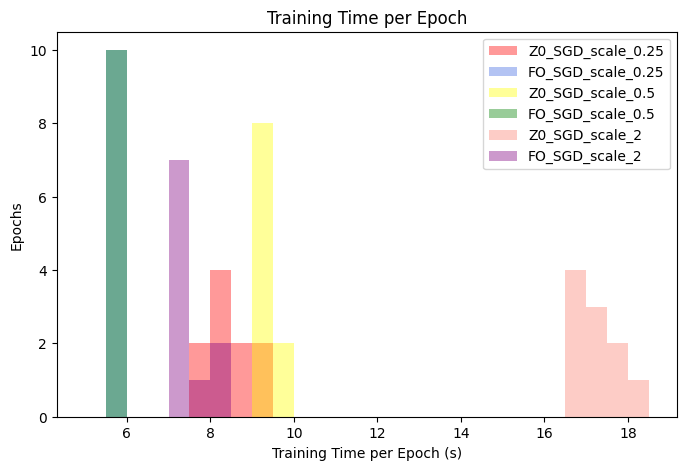

In [12]:
name_list = ['Z0_SGD_scale_0.25', 'FO_SGD_scale_0.25', 'Z0_SGD_scale_0.5',
             'FO_SGD_scale_0.5', 'Z0_SGD_scale_2','FO_SGD_scale_2']
metric_list = [pd.read_csv(f"conv_scale_hybrid/results/{file}.csv") for file in name_list]
visualize_time(name_list, metric_list)

# Hybrid approach

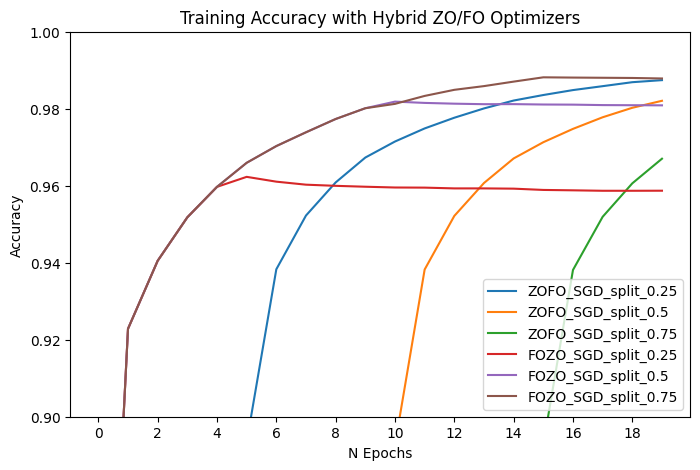

In [8]:
name_list = ['ZOFO_SGD_split_0.25', 'ZOFO_SGD_split_0.5', 'ZOFO_SGD_split_0.75',
             'FOZO_SGD_split_0.25', 'FOZO_SGD_split_0.5','FOZO_SGD_split_0.75']
metric_list = [pd.read_csv(f"conv_scale_hybrid/results/{file}.csv") for file in name_list]
visualize_accuracy(name_list, metric_list, "Training Accuracy with Hybrid ZO/FO Optimizers", "hybridOPT")

# Compare model - MyNetPlus

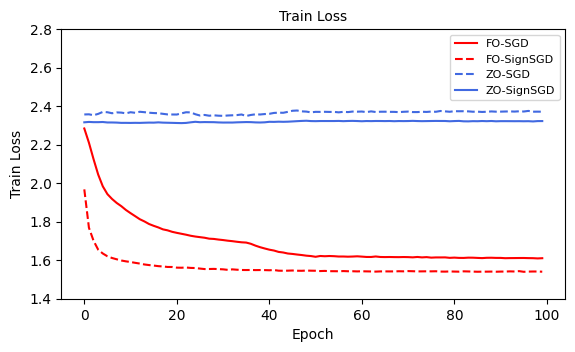

In [17]:
path = "./metrics/"
df_metrics_mynetplus = {}
files_mynetplus = ["compareModel_mynetplus_fo_sgd-ep_98-lr_0.0002-momentum_0.9.csv",
                   "compareModel_mynetplus_fo_sign_sgd-ep_99-lr_0.0002.csv",
                   "compareModel_mynetplus_zo_sgd-ep_29-lr_0.0002-eps_0.001.csv",
                   "compareModel_mynetplus_zo_sign_sgd-ep_37-lr_0.0002-eps_0.001.csv"]
optimizer = ["fo_sgd", "fo_sign_sgd", "zo_sgd", "zo_sign_sgd"]

for optim, file in zip(optimizer, files_mynetplus):
    df_metrics_mynetplus[optim] = pd.read_csv(path + file)

fig, ax = plt.subplots(1, 1, figsize=(6.5, 3.5))
# zo_sgd vs fo_sgd train loss 
ax.plot(df_metrics_mynetplus["fo_sgd"]['train_loss'],label="FO-SGD",color='red')
ax.plot(df_metrics_mynetplus["fo_sign_sgd"]['train_loss'],label="FO-SignSGD",linestyle='dashed',color='red')
ax.plot(df_metrics_mynetplus["zo_sgd"]['train_loss'],label="ZO-SGD",linestyle='dashed',color='royalblue')
ax.plot(df_metrics_mynetplus["zo_sign_sgd"]['train_loss'],label="ZO-SignSGD",color='royalblue')
ax.set_title("Train Loss",fontsize=10)
ax.set_xlabel("Epoch")
ax.set_ylabel('Train Loss')
ax.set_ylim([1.4, 2.8])
ax.legend(loc="upper right", fontsize=8)